# 01 Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02 Import Data

In [2]:
path = r'C:\Users\isava\OneDrive\Documents\CareerFoundry\Data Immersion\AdvancedAnalytics\WorldRiskIndex'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','CleanedData', 'world_risk_index_cleaned.csv'))

# 03 Exploratory Data Analysis

In [15]:
df.head()

Region    WRI  Exposure  Vulnerability  Susceptibility  \
0          Vanuatu  32.00     56.33          56.81           37.14   
1            Tonga  29.08     56.04          51.90           28.94   
2      Philippines  24.32     45.09          53.93           34.99   
3  Solomon Islands  23.51     36.40          64.60           44.11   
4        Guatemala  20.88     38.42          54.35           35.36   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                        79.34                        53.96  2011   
1                        81.80                        44.97  2011   
2                        82.78                        44.01  2011   
3                        85.95                        63.74  2011   
4                        77.83                        49.87  2011   

  Exposure Category WRI Category Vulnerability Category  \
0         Very High    Very High                   High   
1         Very High    Very High                 Medium   
2         Very High    Very High                   High   
3         Very High    Very High              Very High   
4         Very High    Very High                   High   

  Susceptibility Category  
0                    High  
1                  Medium  
2                    High  
3                    High  
4                    High

### Correlation

In [23]:
#Get numerical variables
df_num = df[["WRI", "Exposure", "Vulnerability", "Susceptibility", "Lack of Coping Capabilities", "Lack of Adaptive Capacities", "Year"]]
df_num.head()

WRI  Exposure  Vulnerability  Susceptibility  \
0  32.00     56.33          56.81           37.14   
1  29.08     56.04          51.90           28.94   
2  24.32     45.09          53.93           34.99   
3  23.51     36.40          64.60           44.11   
4  20.88     38.42          54.35           35.36   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  
0                        79.34                        53.96  2011  
1                        81.80                        44.97  2011  
2                        82.78                        44.01  2011  
3                        85.95                        63.74  2011  
4                        77.83                        49.87  2011

In [25]:
df_num.corr()

WRI  Exposure  Vulnerability  \
WRI                          1.000000  0.917590       0.444892   
Exposure                     0.917590  1.000000       0.106945   
Vulnerability                0.444892  0.106945       1.000000   
Susceptibility               0.380634  0.065274       0.935877   
Lack of Coping Capabilities  0.458142  0.147963       0.930899   
Lack of Adaptive Capacities  0.413187  0.087730       0.945447   
Year                         0.025900  0.062173      -0.082936   

                             Susceptibility  Lack of Coping Capabilities  \
WRI                                0.380634                     0.458142   
Exposure                           0.065274                     0.147963   
Vulnerability                      0.935877                     0.930899   
Susceptibility                     1.000000                     0.783953   
Lack of Coping Capabilities        0.783953                     1.000000   
Lack of Adaptive Capacities        0.837965                     0.833198   
Year                              -0.056327                     0.037726   

                             Lack of Adaptive Capacities      Year  
WRI                                             0.413187  0.025900  
Exposure                                        0.087730  0.062173  
Vulnerability                                   0.945447 -0.082936  
Susceptibility                                  0.837965 -0.056327  
Lack of Coping Capabilities                     0.833198  0.037726  
Lack of Adaptive Capacities                     1.000000 -0.230326  
Year                                           -0.230326  1.000000

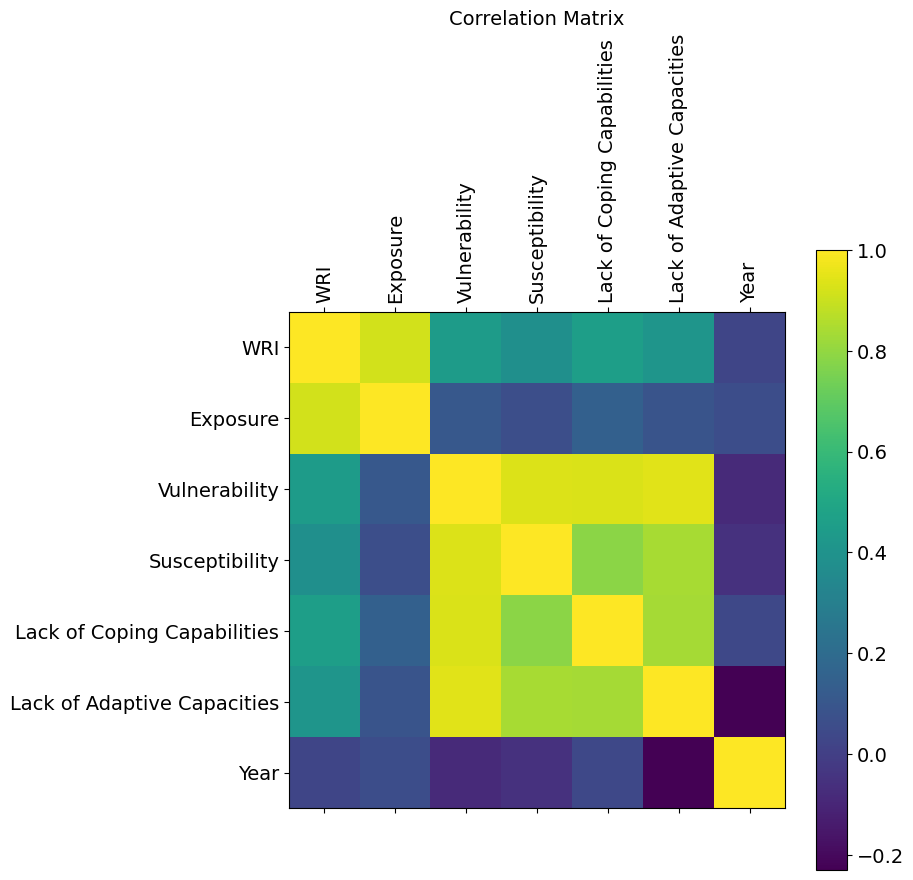

In [65]:
# Create a correlation heatmap using matplotlib

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_num.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
#plt.gcf().set_size_inches(15, 15)
plt.savefig(os.path.join(path,'04 Visualizations', "corr.png"),dpi=300, bbox_inches = "tight")

Many of the world risk index variables are mostly highly correlated with eachothher including: 

- Vulnerability and Susceptibility: 0.94
- Vulnerability and Lack of Coping Capabilities: 0.93
- Vulnerability and Lack of Adaptive Capacities: 0.95
- Susceptibility and Lack of Coping Capabilities: 0.78 
- Sucseptivility and Lack of Adaptive Capacities: 0.84
- Lack of Coping Capabilities and Lack of Adaptive capacities: 0.83

Suprisingly the only factor highly correlated with WRI is exposure at a correlation coefficient of 0.91. The vulnerability scores are lowly correlated at about 0.3-0.4.  Also, the Year is not correlated with any of the risk factors as expected.

Since vulnerability is a measure composed of susceptibility, coping, and adaption I did expect them to be correlated. Exposure is not included as a part of vulnerability. To refresh you, exposure is simply the countries likelihood of being exposed to natural disasters. Vulnerability composes of the three other factors (sucseptiblitiy, coping, adaptation) essentially measuring a society/governments response to natural disaster. The fact that exposure and the vulnerability ranks are not correlated is consistent with their definitiions.

### Scatterplots

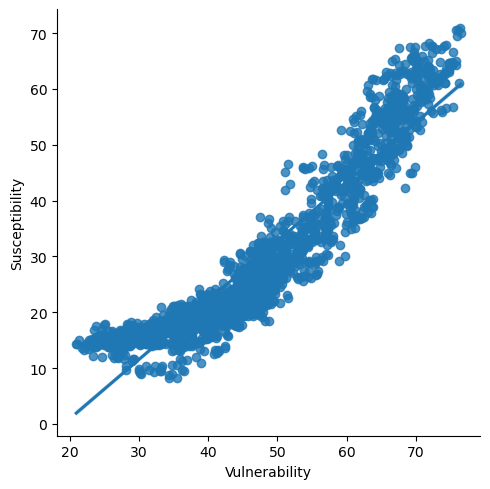

In [9]:
sns.lmplot(x = 'Vulnerability', y = 'Susceptibility', data = df)

This does not seem linear and seems to concave slightly upward. No visible potential outliers in this plot.

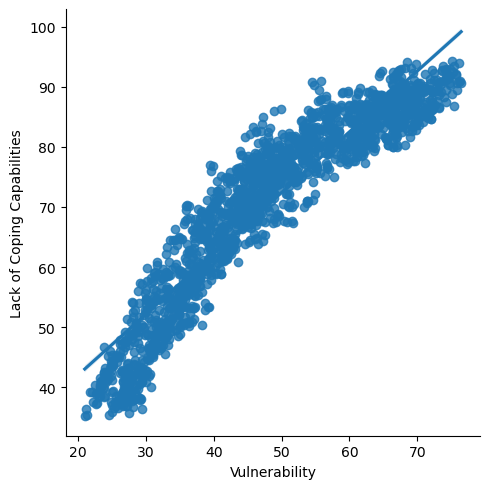

In [12]:
sns.lmplot(x = 'Vulnerability', y = 'Lack of Coping Capabilities', data = df)

This has a downward concave and again no visible potential outliers. 

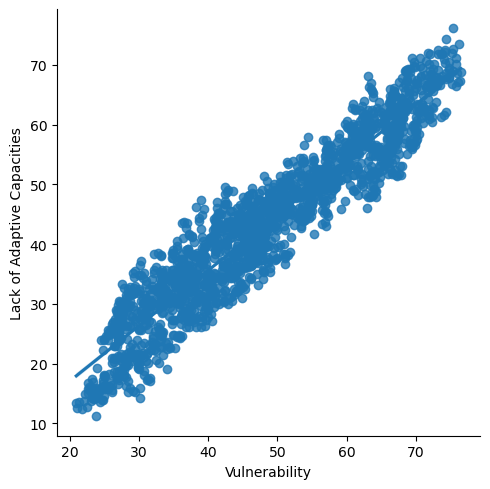

In [15]:
sns.lmplot(x = 'Vulnerability', y = 'Lack of Adaptive Capacities', data = df)

This seems relatively linear. No outliers.

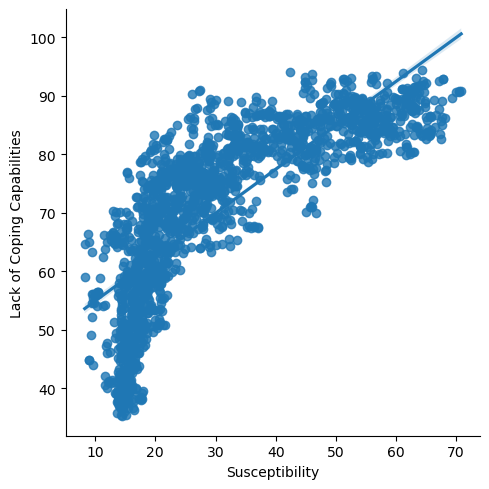

In [17]:
sns.lmplot(x = 'Susceptibility', y = 'Lack of Coping Capabilities', data = df)

Clear logarithmic shape here. No visible outliers.

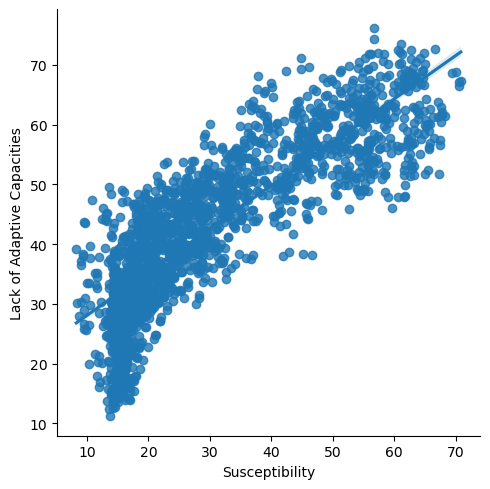

In [20]:
sns.lmplot(x = 'Susceptibility', y = 'Lack of Adaptive Capacities', data = df)

Another logarithmic shape. No clear outliers

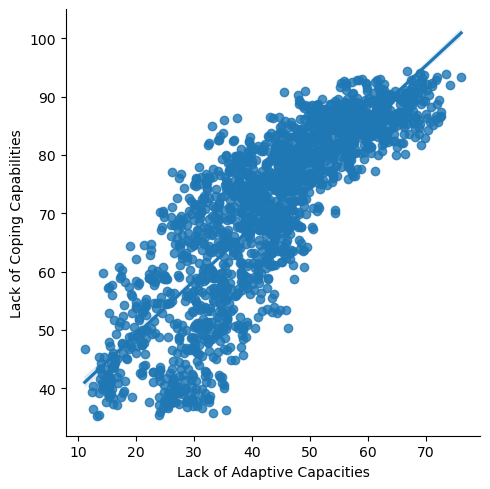

In [23]:
sns.lmplot(x = 'Lack of Adaptive Capacities', y = 'Lack of Coping Capabilities', data = df)

Downward curvature. 

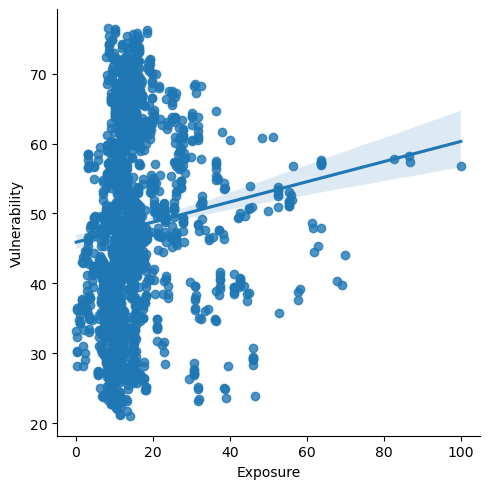

In [28]:
sns.lmplot(x = 'Exposure', y = 'Vulnerability', data = df)

No correlation. Vulnerability varies around the same exposure. There is a couple of outlier points.

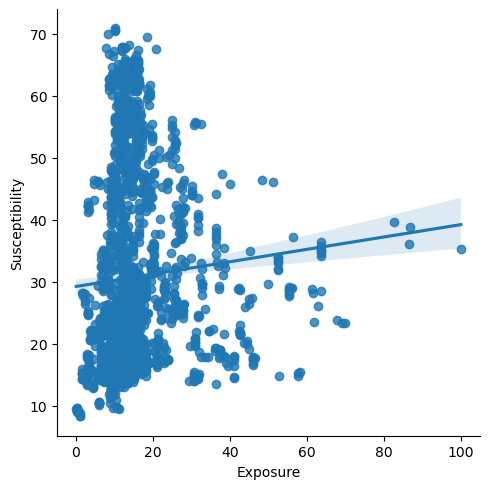

In [30]:
sns.lmplot(x = 'Exposure', y = 'Susceptibility', data = df)

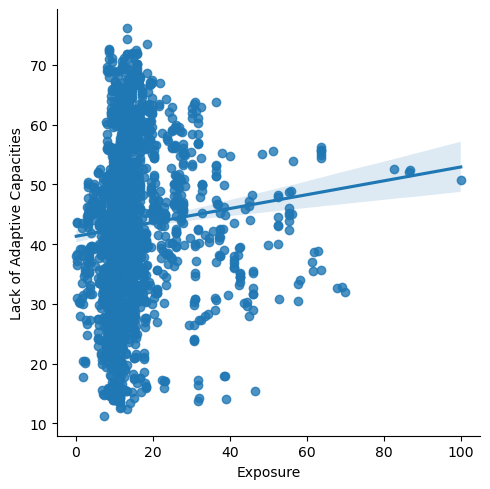

In [32]:
sns.lmplot(x = 'Exposure', y = 'Lack of Adaptive Capacities', data = df)

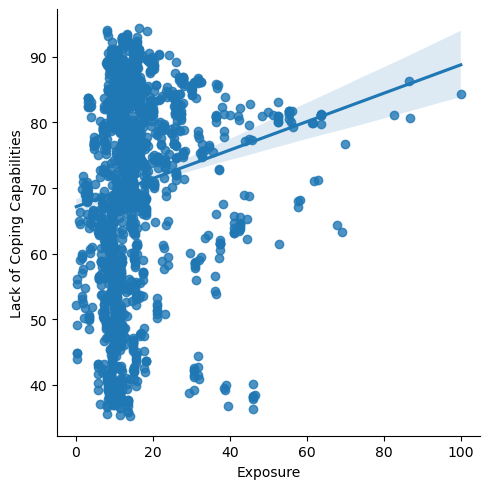

In [34]:
sns.lmplot(x = 'Exposure', y = 'Lack of Coping Capabilities', data = df)

Exposure more sparesly correlated with the vulnerability variables. This indicates that exposure does not effect someones vulnerability and subsequesntyl their susceptibility, copin and adaptiation. 

Text(0.5, 1.0, 'WRI vs Exposure Scatterplot')

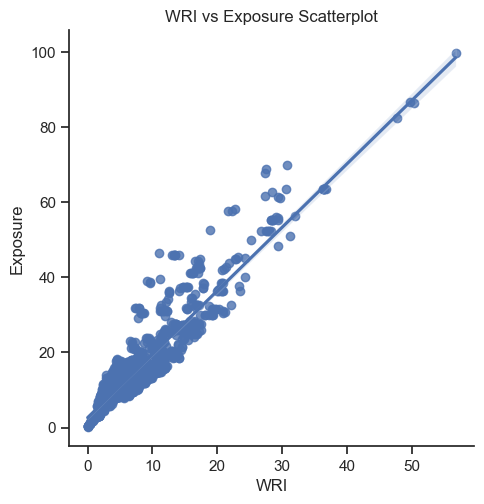

In [97]:
sns.lmplot(x = 'WRI', y = 'Exposure', data = df)
plt.title('WRI vs Exposure Scatterplot')

Appears quite linear but clustering towards the bottom.

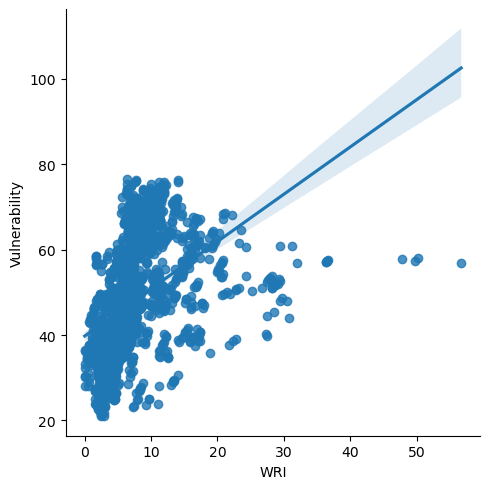

In [47]:
sns.lmplot(x = 'WRI', y = 'Vulnerability', data = df)

Again sort of a logarithmic shape.

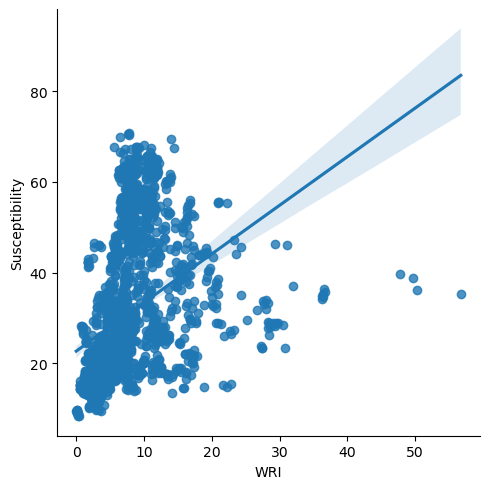

In [50]:
sns.lmplot(x = 'WRI', y = 'Susceptibility', data = df)

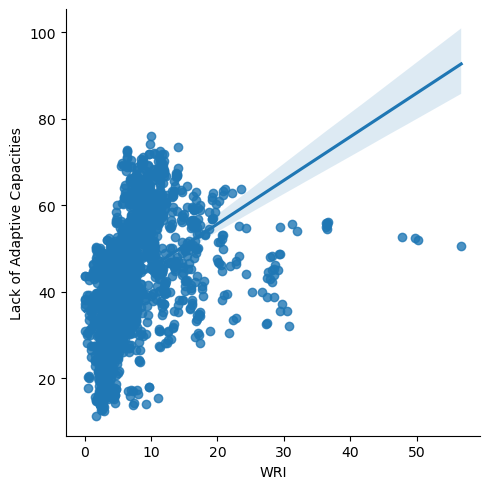

In [52]:
sns.lmplot(x = 'WRI', y = 'Lack of Adaptive Capacities', data = df)

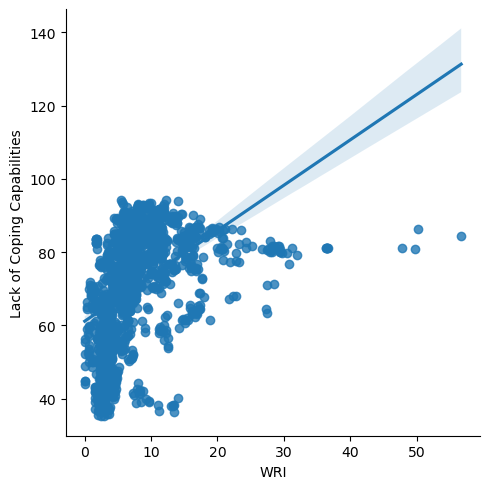

In [54]:
sns.lmplot(x = 'WRI', y = 'Lack of Coping Capabilities', data = df)

A lot of clustering towards the left side. Indicates that for vulnerability and its three sub categories that most countries with low WRI vary in these variables but some with a high WRI tend to be higher in those categories. 

### Categorical Plots

In [38]:
df.head()

Region    WRI  Exposure  Vulnerability  Susceptibility  \
0          Vanuatu  32.00     56.33          56.81           37.14   
1            Tonga  29.08     56.04          51.90           28.94   
2      Philippines  24.32     45.09          53.93           34.99   
3  Solomon Islands  23.51     36.40          64.60           44.11   
4        Guatemala  20.88     38.42          54.35           35.36   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                        79.34                        53.96  2011   
1                        81.80                        44.97  2011   
2                        82.78                        44.01  2011   
3                        85.95                        63.74  2011   
4                        77.83                        49.87  2011   

  Exposure Category WRI Category Vulnerability Category  \
0         Very High    Very High                   High   
1         Very High    Very High                 Medium   
2         Very High    Very High                   High   
3         Very High    Very High              Very High   
4         Very High    Very High                   High   

  Susceptibility Category  
0                    High  
1                  Medium  
2                    High  
3                    High  
4                    High

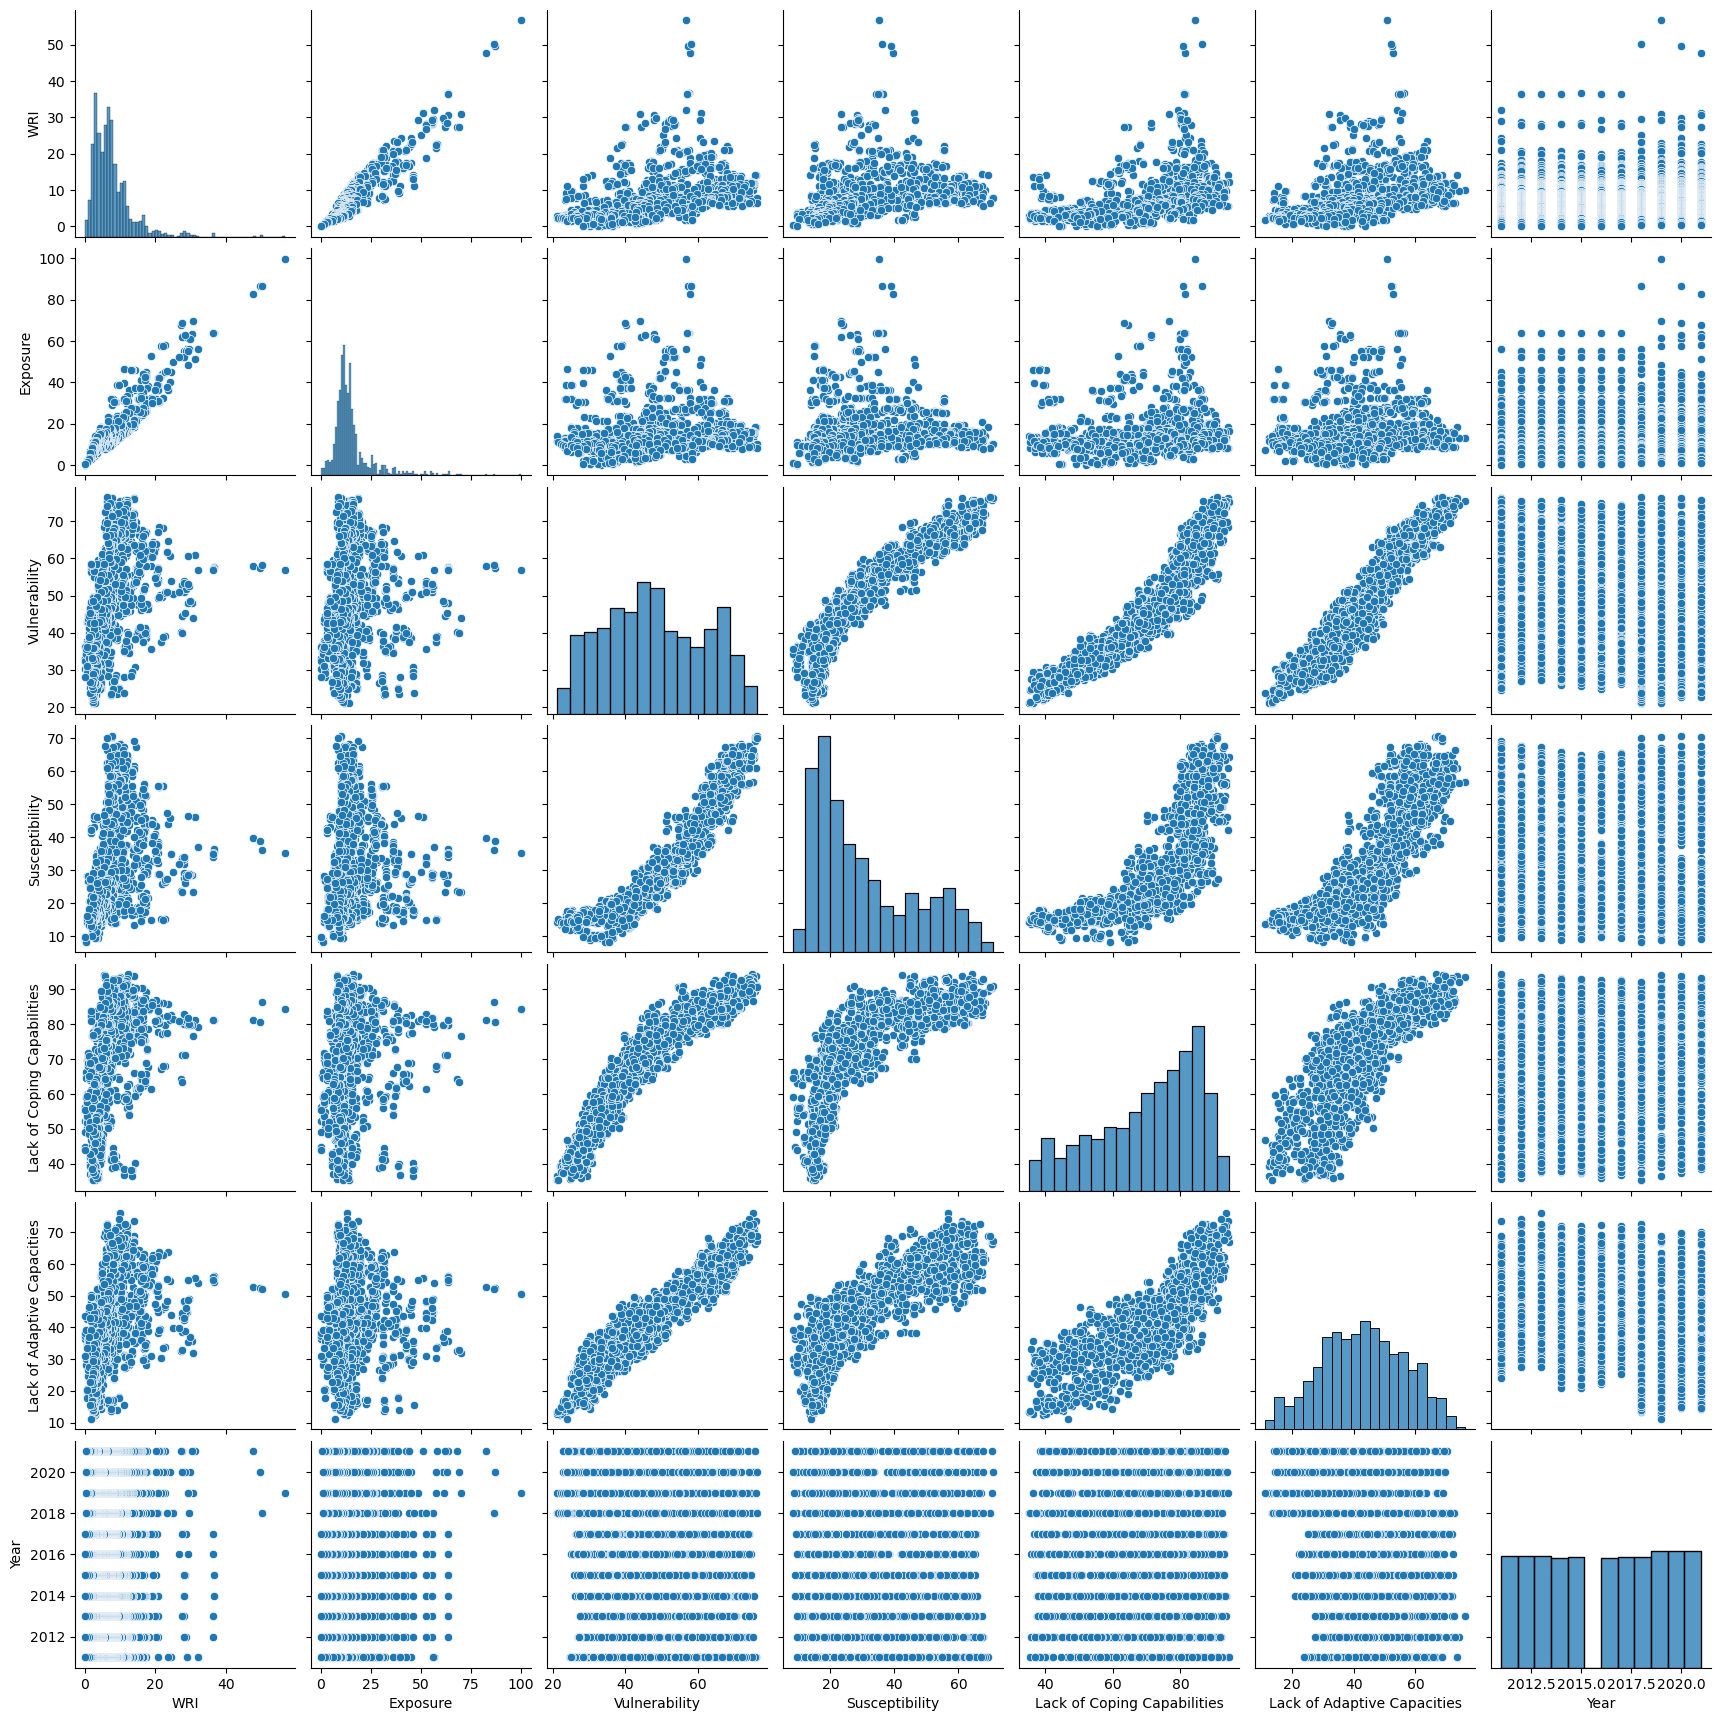

In [42]:
g = sns.pairplot(df)

- **WRI**: right skewed. This indicates that many countries have a low WRI. This essentially highlights that there are some countries with higher risk scores facing challenges in risk management whether that be due to vulnerability or exposure.
- **Exposure**: right skewed. Similarly this indactes that many countries do not face exposure challenges. 
- **Vulnerability**: unclear - potentially bimodal, normal or uniform. There seems to be two distinc peaks where most countries lie in terms of vulnerability. Some more research into the difference between these peaks would be informative.
- **Susceptibility**: unclear - postentially bimodal or right skewed. Again there does seem to be two distinct peaks. The left peak is high indicating that many countries lie in a lower susceptibilirt range. The differences between the two peaks is a point of further analysis. 
- **Lack of Coping Capabilities** - right skewed. Many countries lack coping capabilities. This suggests that there are challenges in responding to disaster in a controlled manner.
- **Lack of Adaptive Capacities** - normal. Many countries stay around the mean of adaptive capacities. It may be useful to lower that mean to expore how countries with lower lack of adaptive capcities are planning ahead for disaster mitigation. 
- **Year** - Uniform - Expected, some years have slighltly more counts than others

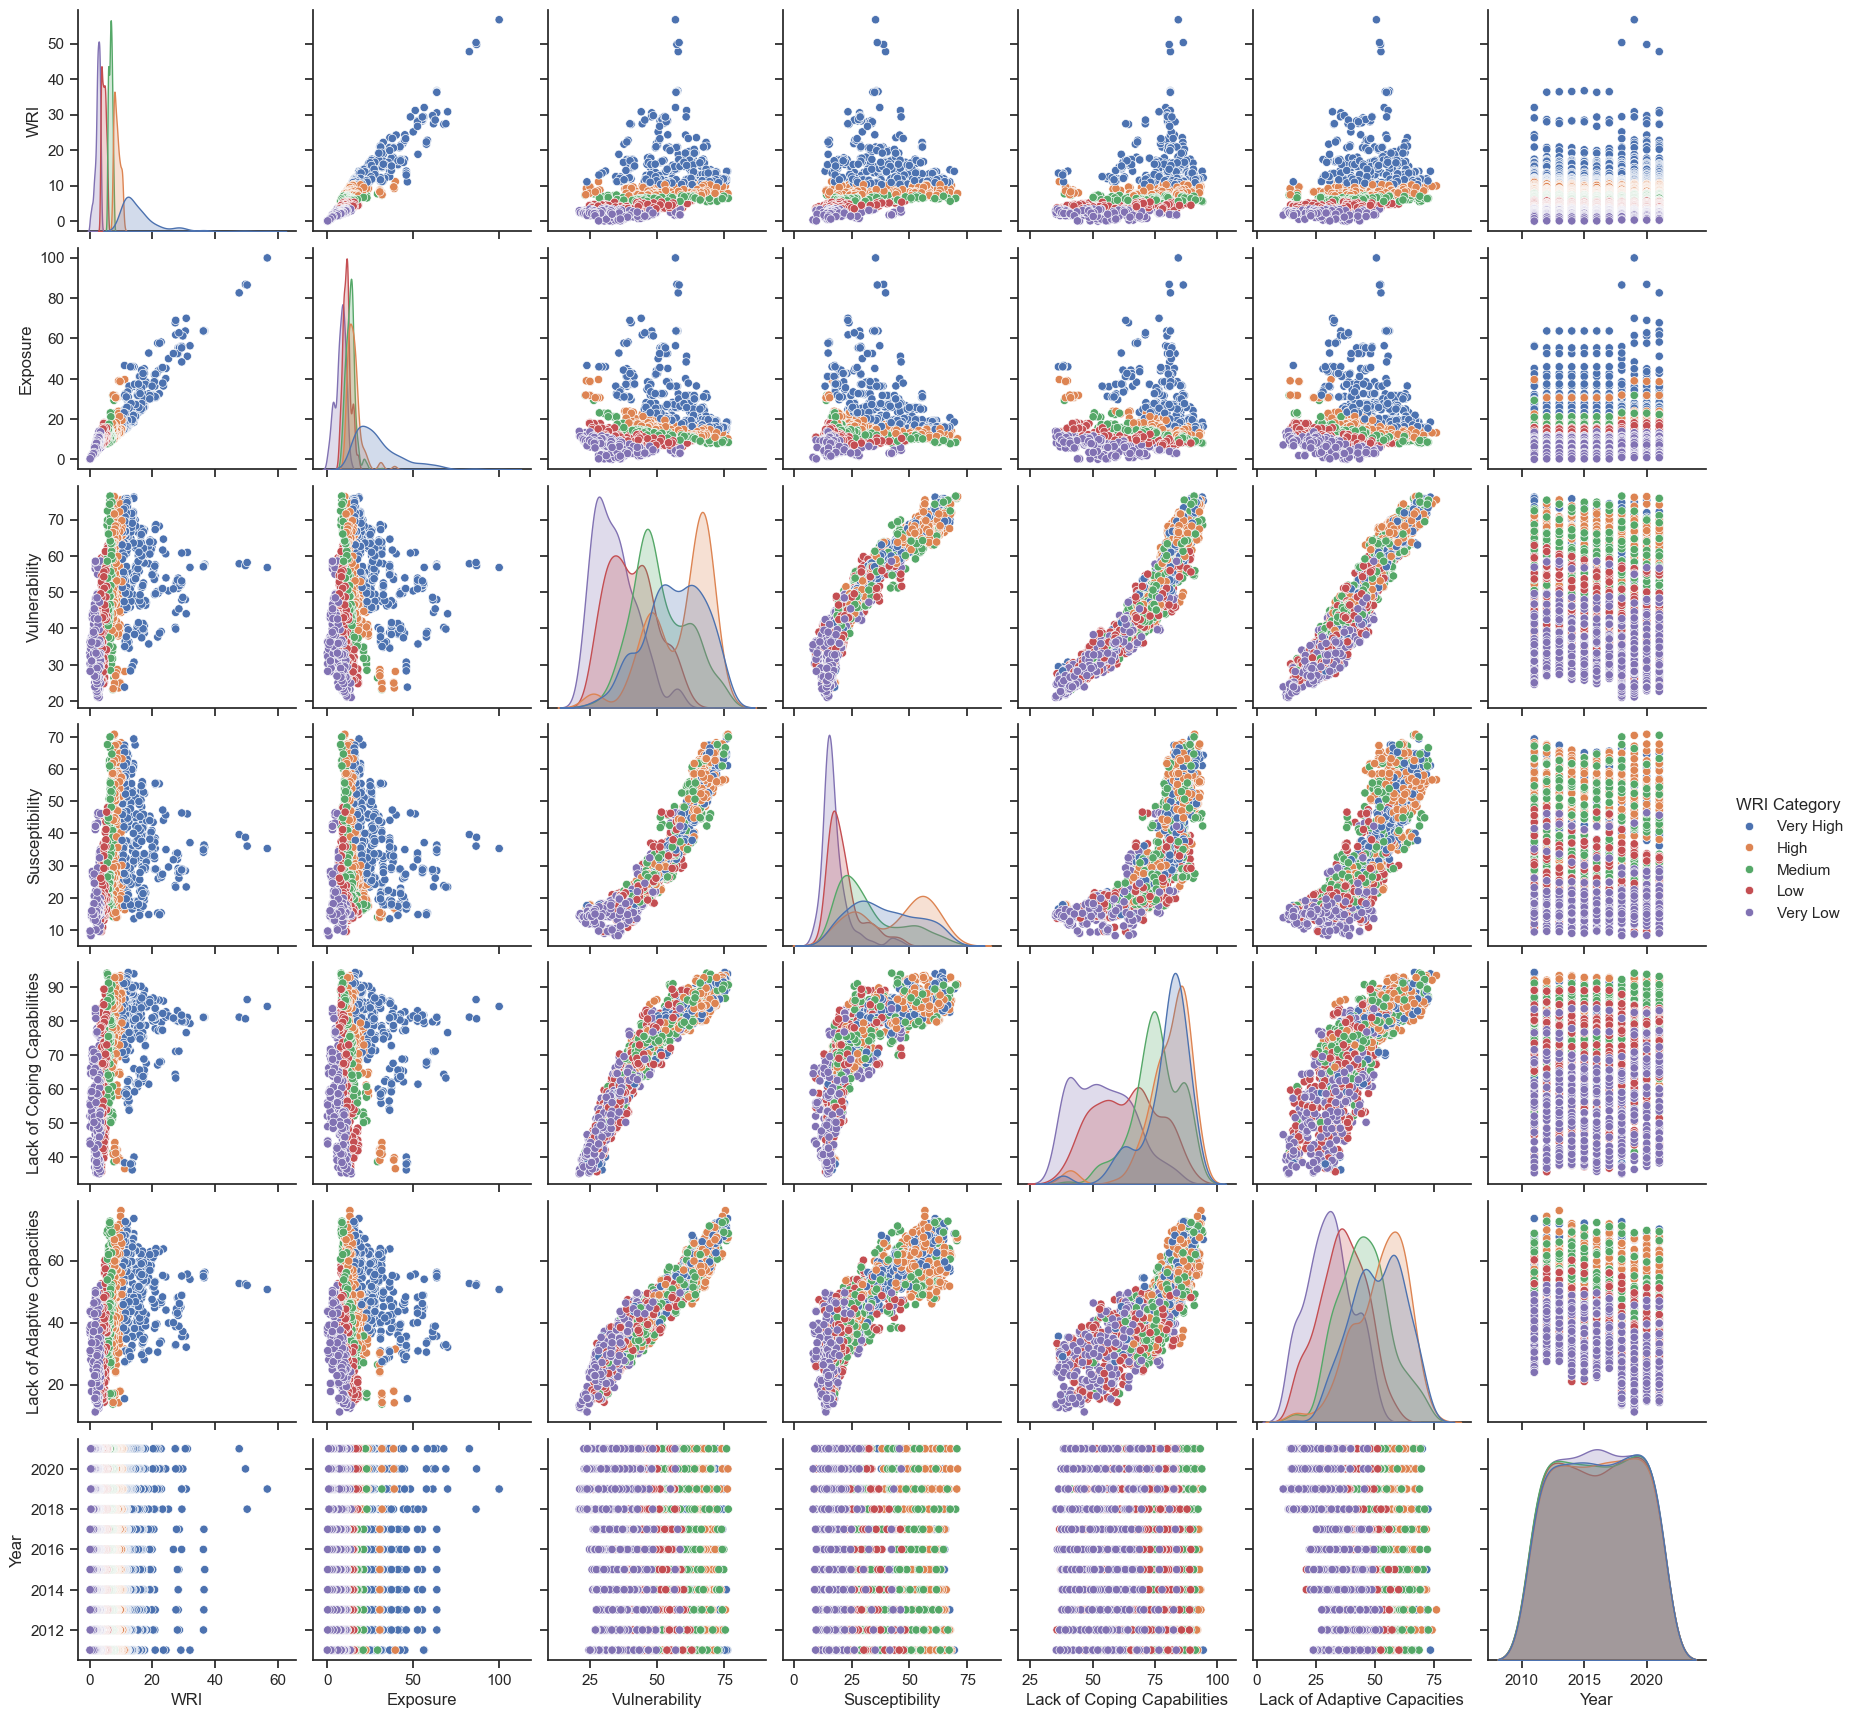

In [92]:
g = sns.pairplot(df, hue = 'WRI Category')

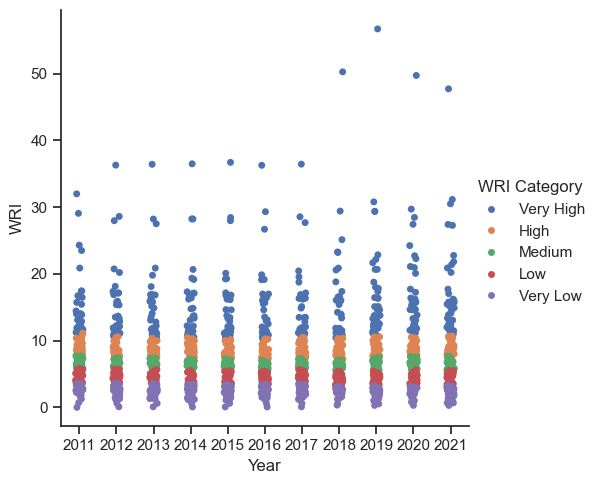

In [61]:
sns.set(style="ticks")
g = sns.catplot(x="Year", y="WRI", hue="WRI Category", data=df)

Consistent patterns across the years. It only appears that some countries got higher WRIS starting in 2018 but these years have more countries so it may be just due to that. 

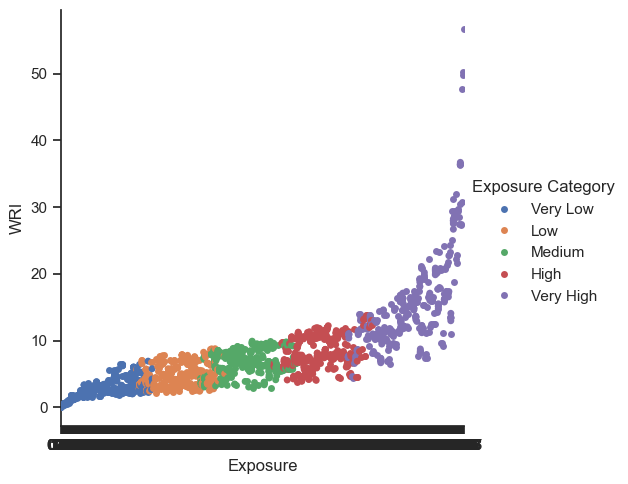

In [66]:
sns.set(style="ticks")
g = sns.catplot(x="Exposure", y="WRI", hue="Exposure Category", data=df)

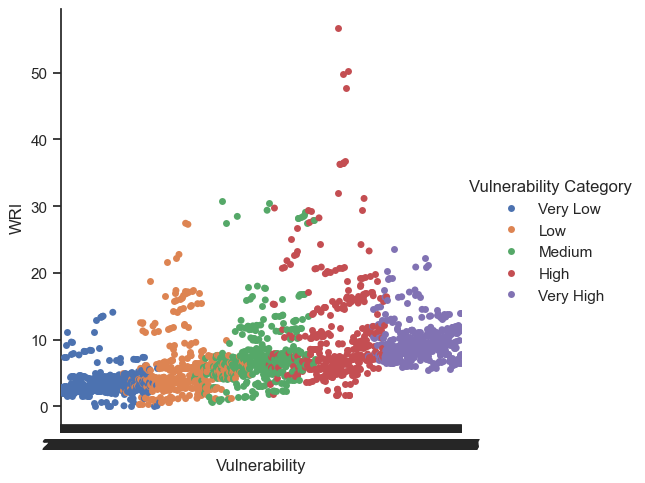

In [68]:
sns.set(style="ticks")
g = sns.catplot(x="Vulnerability", y="WRI", hue="Vulnerability Category", data=df)

As expected the highest WRI also have the highest exposure. Vulnerability does not have such a correlation as 'High' vulnerabilities have the countries with the highes WRIs but we do see jumps throughout all categories of Vulnerability.

# Questions

**- Do exposure and vulnerability tend to be correlated?**  

No, they are not correlated. Their correlation value is 0.1069. This suggests that both contribute nearly independently to the WRI.

### More Questions

- Why does vulnerability affect WRI across all levels? Is this due to exposure being a stronger indicator of WRI?
- Which countries have highest WRI? Which countries have highest Vulnerability? Which countries have highest exposure? Are there similarities amongst them sugh as region, longitude, government types, terrain types, etc? 


### Hypothesis

1. If the country has a high exposure it is more likely to have a high WRI. The vulnerability is not a large predictor of WRI. 
